In [1]:
# 데이터셋 불러오기
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv
/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_240.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_295.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_158.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_35.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_145.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_476.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_449.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_104.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_419.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_136.par

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
# train_batch1 dataset
train_batch1=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet')
print(train_batch1)
print(train_batch1.info())

          sensor_id   time  charge  auxiliary
event_id                                     
24             3918   5928   1.325       True
24             4157   6115   1.175       True
24             3520   6492   0.925       True
24             5041   6665   0.225       True
24             2948   8054   1.575       True
...             ...    ...     ...        ...
3266196        1961  17617   0.975       True
3266196          36  17705   0.625       True
3266196         356  18192   0.725       True
3266196        2826  18609   0.575       True
3266196        5013  18741   1.375       True

[32792416 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 32792416 entries, 24 to 3266196
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  int16  
 1   time       int64  
 2   charge     float64
 3   auxiliary  bool   
dtypes: bool(1), float64(1), int16(1), int64(1)
memory usage: 844.4 MB
None


In [4]:
# test_dataset
test_batch666=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet')
print(test_batch666)
print(test_batch666.info())

          sensor_id   time  charge  auxiliary
event_id                                     
2092           4066   6170   1.275       True
2092           3512   6374   0.975       True
2092            897   6378   1.475       True
2092           2060   6590   0.925       True
2092           3072   6625   1.075       True
...             ...    ...     ...        ...
9482           1133  13334   0.675       True
9482           2190  14112   1.075       True
9482           2057  14713   0.975       True
9482           4486  14765   1.425       True
9482           4159  14929   1.025       True

[378 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 2092 to 9482
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_id  378 non-null    int16  
 1   time       378 non-null    int64  
 2   charge     378 non-null    float64
 3   auxiliary  378 non-null    bool   
dtypes: bool(1), float64(1), int16(

In [5]:
# file_name organization
train_file_paths = []

for dirname, _, filenames in os.walk('/kaggle/input/icecube-neutrinos-in-deep-ice/train'):
    for filename in filenames:
        train_file_paths.append(os.path.join(dirname, filename))

train_file_paths  = sorted(train_file_paths,key=lambda x: int(x.split('/')[-1].split('_')[-1].split('.')[0]))
                                             

In [6]:
# train first file import
train=pd.read_parquet(train_file_paths[0])
print(train_file_paths[0])
print(train.info())

/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet
<class 'pandas.core.frame.DataFrame'>
Index: 32792416 entries, 24 to 3266196
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  int16  
 1   time       int64  
 2   charge     float64
 3   auxiliary  bool   
dtypes: bool(1), float64(1), int16(1), int64(1)
memory usage: 844.4 MB
None


In [7]:
# train_meta dataset import
train_target=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet')
print(train_target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131953924 entries, 0 to 131953923
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   batch_id           int64  
 1   event_id           Int64  
 2   first_pulse_index  int64  
 3   last_pulse_index   int64  
 4   azimuth            float64
 5   zenith             float64
dtypes: Int64(1), float64(2), int64(3)
memory usage: 6.0 GB
None


In [8]:
train_target.head(20)

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117
5,1,77,352,401,0.011372,1.295371
6,1,79,402,717,3.533397,2.479947
7,1,82,718,762,5.252108,0.672366
8,1,121,763,803,3.084929,2.065880
9,1,127,804,846,6.154335,1.371721


In [9]:
# test_meta dastset import
test_target=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet')
test_target.head(20)


,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


In [10]:
# submission file example
test_submission=pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet')
test_submission.head(10)

,event_id,azimuth,zenith
0,2092,1,1
1,7344,1,1
2,9482,1,1


In [11]:
# sensor_position dataset import
sensor_geometry = pd.read_csv('/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv')
sensor_geometry.head()

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95


In [12]:
# dataset analsis
pd.set_option('display.max_rows',None)

In [13]:
# About event_id==24 dataset
event_24=train_batch1[train_batch1.index==24]
print(event_24)

          sensor_id   time  charge  auxiliary
event_id                                     
24             3918   5928   1.325       True
24             4157   6115   1.175       True
24             3520   6492   0.925       True
24             5041   6665   0.225       True
24             2948   8054   1.575       True
24              860   8124   0.675       True
24             2440   8284   1.625       True
24             1743   8478   0.775       True
24             3609   8572   1.025       True
24             5057   8680   3.975       True
24             5057   8723   0.775       True
24             2977   8747   1.025       True
24             5059   9868   1.375      False
24             3496   9976   0.825       True
24             3161  10259   0.775       True
24             2959  10642   0.225       True
24             1397  10848   0.825       True
24             1970  10973   0.925       True
24             3387  11023   1.125       True
24             1583  11085   0.675

In [14]:
# About event_id==24 dataset (auxiliary=False)
event_24F=train_batch1[(train_batch1.index==24)&(train_batch1['auxiliary']==False)]
print(event_24F)

          sensor_id   time  charge  auxiliary
event_id                                     
24             5059   9868   1.375      False
24              558  12201   0.225      False
24              557  12206   1.225      False
24              557  12227   0.975      False
24              558  12339   1.225      False
24              557  12377   0.725      False
24              557  12436   0.175      False
24              553  12607   0.375      False
24              972  12723   0.475      False
24              973  12773   1.125      False
24              975  12818   0.675      False
24              560  13081   0.375      False
24              554  13262   0.725      False


In [15]:
unique_event_24=event_24['sensor_id'].unique()
print(unique_event_24)

print(len(unique_event_24))

[3918 4157 3520 5041 2948  860 2440 1743 3609 5057 2977 5059 3496 3161
 2959 1397 1970 3387 1583 1940 1241  558  557 1405 3050  553  972  973
 2261  975  560  554 3276 4831 4571 3699  300  613 3438 2421 3115 4528
 2448 3289 4904 3452   48 3267  104]
49


In [16]:
unique_event_24F=event_24F['sensor_id'].unique()
print(unique_event_24F)

print(len(unique_event_24F))

[5059  558  557  553  972  973  975  560  554]
9


In [17]:
for sensor_idF in unique_event_24F:
    x,y,z=sensor_geometry[sensor_geometry['sensor_id']==sensor_idF][['x','y','z']].values[0]
    print(f"Sensor ID: {sensor_idF} x: {x}, y: {y}, z: {z} ")

Sensor ID: 5059 x: -9.68, y: -79.5, z: -219.49 
Sensor ID: 558 x: 35.54, y: -364.83, z: 191.34 
Sensor ID: 557 x: 35.54, y: -364.83, z: 208.36 
Sensor ID: 553 x: 35.54, y: -364.83, z: 276.44 
Sensor ID: 972 x: -43.27, y: -267.52, z: 295.88 
Sensor ID: 973 x: -43.27, y: -267.52, z: 278.85 
Sensor ID: 975 x: -43.27, y: -267.52, z: 244.81 
Sensor ID: 560 x: 35.54, y: -364.83, z: 157.3 
Sensor ID: 554 x: 35.54, y: -364.83, z: 259.42 


In [18]:
for sensor_id in unique_event_24:
    x,y,z=sensor_geometry[sensor_geometry['sensor_id']==sensor_id][['x','y','z']].values[0]
    print(f"Sensor ID: {sensor_id} x: {x}, y: {y}, z: {z} ")

Sensor ID: 3918 x: 303.41, y: 335.64, z: 206.58 
Sensor ID: 4157 x: -145.45, y: 374.24, z: 212.73 
Sensor ID: 3520 x: 505.27, y: 257.88, z: -174.6 
Sensor ID: 5041 x: -9.68, y: -79.5, z: 181.0 
Sensor ID: 2948 x: 576.37, y: 170.92, z: 357.88 
Sensor ID: 860 x: -290.66, y: -307.38, z: 163.61 
Sensor ID: 2440 x: -526.63, y: -15.6, z: -178.17 
Sensor ID: 1743 x: 500.43, y: -58.45, z: 450.79 
Sensor ID: 3609 x: -313.6, y: 237.44, z: 348.01 
Sensor ID: 5057 x: -9.68, y: -79.5, z: -205.47 
Sensor ID: 2977 x: 576.37, y: 170.92, z: -135.72 
Sensor ID: 5059 x: -9.68, y: -79.5, z: -219.49 
Sensor ID: 3496 x: 505.27, y: 257.88, z: 233.9 
Sensor ID: 3161 x: -234.95, y: 140.44, z: -197.79 
Sensor ID: 2959 x: 576.37, y: 170.92, z: 170.65 
Sensor ID: 1397 x: -245.65, y: -190.49, z: 212.13 
Sensor ID: 1970 x: -324.39, y: -93.43, z: -350.9 
Sensor ID: 3387 x: 257.31, y: 211.66, z: 44.86 
Sensor ID: 1583 x: 124.97, y: -131.25, z: 102.18 
Sensor ID: 1940 x: -324.39, y: -93.43, z: 159.72 
Sensor ID: 1241 

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# try1: time first & time last (auxiliary=False)
sensor_first=event_24F['sensor_id'].values[0]
x1,y1,z1=sensor_geometry[sensor_geometry['sensor_id']==sensor_first][['x','y','z']].values[0]


sensor_last=event_24F['sensor_id'].values[-1]
x2,y2,z2=sensor_geometry[sensor_geometry['sensor_id']==sensor_last][['x','y','z']].values[-1]

print(f' x1: {x1}, y1 {y1}, z1: {z1}')
print(f' x2: {x2}, y2 {y2}, z2: {z2}')

 x1: -9.68, y1 -79.5, z1: -219.49
 x2: 35.54, y2 -364.83, z2: 259.42


In [21]:
# figure range 

x_min = float('inf')
x_max = float('-inf')
y_min = float('inf')
y_max = float('-inf')
z_min = float('inf')
z_max = float('-inf')

for sensor_id in unique_event_24:
    x,y,z=sensor_geometry[sensor_geometry['sensor_id']==sensor_id][['x','y','z']].values[0]
    x_min=min(x_min,x)
    x_max = max(x_max, x)
    y_min = min(y_min, y)
    y_max = max(y_max, y)
    z_min = min(z_min, z)
    z_max = max(z_max, z)

print(f"x 최솟값: {x_min}, x 최댓값: {x_max}")
print(f"y 최솟값: {y_min}, y 최댓값: {y_max}")
print(f"z 최솟값: {z_min}, z 최댓값: {z_max}")

x 최솟값: -526.63, x 최댓값: 576.37
y 최솟값: -521.08, y 최댓값: 490.22
z 최솟값: -438.08, z 최댓값: 499.51


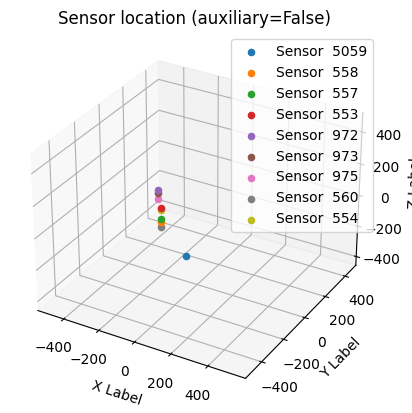

In [22]:
# sensor_posion event_24 (auxiliary=False)

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for sensor_id in unique_event_24F:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id][['x', 'y', 'z']].values[0]
    ax.scatter(x, y, z, label=f'Sensor  {sensor_id}')

# 그래프에 레이블 추가
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)



# 그래프 제목 추가
plt.title('Sensor location (auxiliary=False)')

# 범례 추가

ax.legend()

# 그래프 표시
plt.show()

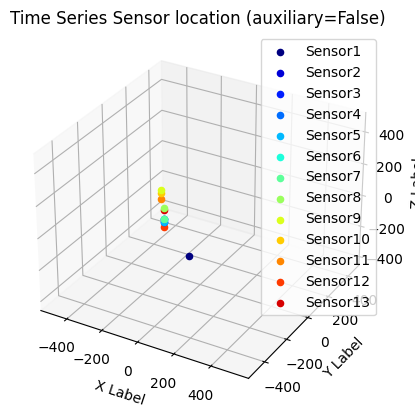

In [23]:
# try1 check timeseries sensor_position

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color_mapping = {}

for index, row in enumerate(event_24F.itertuples()):  
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == row.sensor_id][['x', 'y', 'z']].values[0]
    
  
    label = f'Sensor{index + 1}'
    if label not in color_mapping:
        color_mapping[label] = plt.cm.jet(index / len(event_24F))

    ax.scatter(x, y, z, label=label, c=[color_mapping[label]])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

plt.title('Time Series Sensor location (auxiliary=False)')

ax.legend()

plt.show()



In [24]:
azimuth_24, zenith_24 = train_target.loc[train_target['event_id'] == 24, ['azimuth', 'zenith']].values[0]
print(f"azimuth: {azimuth_24}, zenith_24: {zenith_24}")

trans_x=np.cos(azimuth_24)*np.sin(zenith_24)
trans_y=np.sin(azimuth_24)*np.sin(zenith_24)
trans_z=np.cos(zenith_24)

print(f"trans_x:{trans_x} ,trans_y: {trans_y}, trans_z: {trans_z}" )


azimuth: 5.029554633390068, zenith_24: 2.0874975005610428
trans_x:0.2711606932818947 ,trans_y: -0.8260880094077094, trans_z: -0.4940146547742188


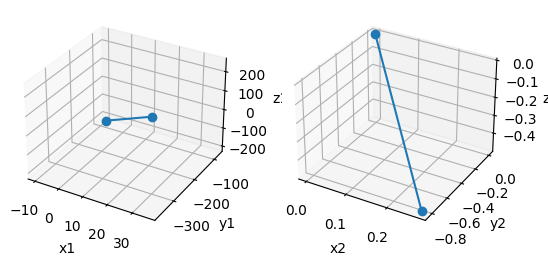

In [25]:
# try1: Fail 방향성이 정반대
fig = plt.figure()


ax1 = fig.add_subplot(121, projection='3d')  

ax1.plot([x1, x2], [y1, y2], [z1, z2], marker='o', linestyle='-')
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax1.set_zlabel('z1')


ax2 = fig.add_subplot(122, projection='3d') 
ax2.plot([0, trans_x], [0, trans_y], [0, trans_z], marker='o', linestyle='-')
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')
ax2.set_zlabel('z2')


plt.show()


In [26]:
#try2 Linear Regression
import sklearn.linear_model
x_list=[]
y_list=[]
z_list=[]
for sensor_id1 in unique_event_24F:
    x, y, z = sensor_geometry[sensor_geometry['sensor_id'] == sensor_id1][['x', 'y', 'z']].values[0]
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
x_list=np.array(x_list)
y_list=np.array(y_list)
z_list=np.array(z_list)
print(x_list)
print(y_list)
print(z_list)

[ -9.68  35.54  35.54  35.54 -43.27 -43.27 -43.27  35.54  35.54]
[ -79.5  -364.83 -364.83 -364.83 -267.52 -267.52 -267.52 -364.83 -364.83]
[-219.49  191.34  208.36  276.44  295.88  278.85  244.81  157.3   259.42]


LinearRegression()

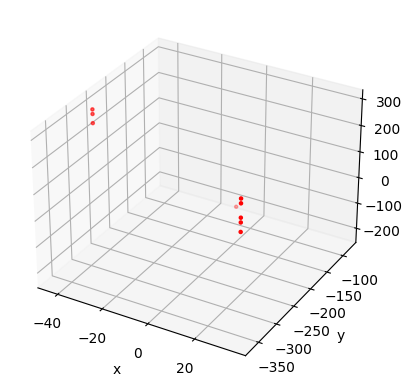

In [27]:
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x_list,y_list,z_list,marker='.',color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

X_train=np.vstack([x_list,y_list])
X_train=X_train.T
y_train=z_list

model=sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)

In [28]:
coefs=model.coef_
intercept=model.intercept_
print(coefs)
print(intercept)

[-3.21837375 -2.04534   ]
-413.24838746896


In [32]:
print("Equation: {:.2f}x + {:.2f}y +z + {:.2f} =0" .format(-coefs[0],-coefs[1],-intercept))

Equation: 3.22x + 2.05y +z + 413.25 =0


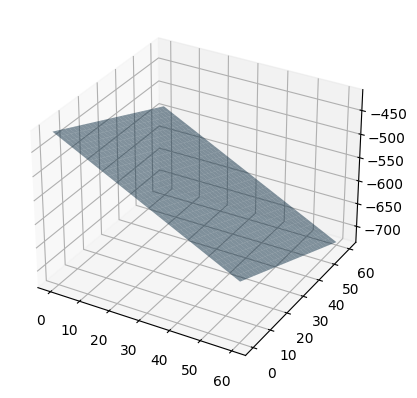

In [31]:
# Regression plane figure
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

xs=np.tile(np.arange(61),(61,1))
ys=np.tile(np.arange(61),(61,1)).T
zs=xs*coefs[0]+ys*coefs[1]+intercept

ax.plot_surface(xs,ys,zs,alpha=0.5)

plt.show()

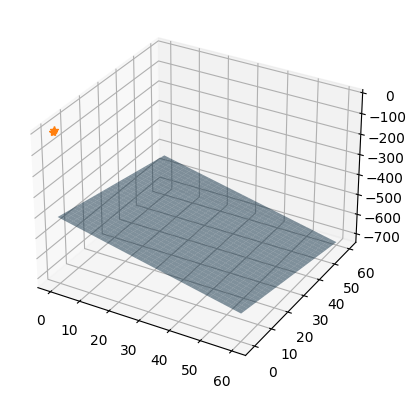

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 평면의 방정식 계수
a, b, c, d = coefs[0], coefs[1], -1, intercept

# 평면의 범위 설정
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_plane, y_plane = np.meshgrid(x_range, y_range)
z_plane = (-a * x_plane - b * y_plane - d) / c

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 평면을 표시
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# 그래프 범위 설정
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# 그래프 레이블 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 그래프 제목 추가
plt.title('Regression Plane')


In [50]:
# 평면의 방정식: ax + by + cz + d = 0
a, b, c, d = coefs[0], coefs[1], -1, intercept

# 점 P1(0, 0, 0)에서 시작하여 trans_x, trans_y, trans_z 방향으로 나아가는 직선의 방정식
# P(t) = (trans_x*t, trans_y*t, trans_z*t)

t_intersection = -d / (a * trans_x + b * trans_y + c * trans_z)

# interaction point
intersection_point = (trans_x * t_intersection, trans_y * t_intersection, trans_z * t_intersection)

# trans_x, trans_y, trans_z에서 평면에 수직으로 내린 점의 좌표 계산
t_perpendicular = (a * trans_x + b * trans_y + c * trans_z + d) / (a * a + b * b + c * c)
perpendicular_point = (trans_x - a * t_perpendicular, trans_y - b * t_perpendicular, trans_z - c * t_perpendicular)

print("교점 좌표:", intersection_point)
print("수직으로 내린 점 좌표:", perpendicular_point)


교점 좌표: (85.47755519963692, -260.40641277789655, -155.7274559664668)
수직으로 내린 점 좌표: (-85.03475165046824, -55.03967788560177, -26.999920766671792)


In [54]:
# predict azimuth, zenith
intersection_point = np.array(intersection_point)
perpendicular_point = np.array(perpendicular_point)


# prediction vector 
direction_vector = perpendicular_point - intersection_point

direction_vector_magnitude = np.linalg.norm(direction_vector)
# direction unit vector
normalized_direction=direction_vector / magnitude

predict_azimuth = np.arctan2(normalized_direction[1], normalized_direction[0])
if predict_azimuth < 0 :
    predict_azimuth += 2* np.pi
    
predict_zenith = np.arccos(normalized_direction[2])

print("방향 벡터:", normalized_direction)
print("방위각 (Azimuth):", predict_azimuth)
print("고각 (zenith):", predict_zenith)

방향 벡터: [-0.57538327  0.69299739  0.43438313]
방위각 (Azimuth): 2.2637311216415905
고각 (zenith): 1.1214430152604666


In [55]:
# compare 
print(azimuth_24,zenith_24)
print(predict_azimuth,predict_zenith)

5.029554633390068 2.0874975005610428
2.2637311216415905 1.1214430152604666


In [62]:
# predict and True value angular error
#True
sa1=np.sin(azimuth_24)
ca1=np.cos(azimuth_24)
sz1=np.sin(zenith_24)
cz1=np.cos(zenith_24)

#Predict
sa2=np.sin(predict_azimuth)
ca2=np.cos(predict_azimuth)
sz2=np.sin(predict_zenith)
cz2=np.cos(predict_zenith)

scalar_prod=sz1*sz2*(ca1*ca2+sa1*sa2)+(cz1*cz2)

scalar_prod=np.clip(scalar_prod,-1,1)

angular_error=np.abs(np.arccos(scalar_prod))
print(angular_error)

2.802599013186513
